In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://talentcocomedia.s3.amazonaws.com/ml-assets/heart-disease.csv')

In [3]:
y = df['target']

In [4]:
x = df.drop('target',axis=1)

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**GridSearchCV**

Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
lr_model = LogisticRegression(penalty='l2')
val = list(np.arange(1, 10, 1))
parameters = {'solver':('newton-cg', 'liblinear', 'sag', 'saga'), 'C':val}
clf_lr = GridSearchCV(lr_model, parameters)
clf_lr.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'solver': ('newton-cg', 'liblinear', 'sag', 'saga')})

In [7]:
print(clf_lr.best_params_)

{'C': 1, 'solver': 'newton-cg'}


In [8]:
test_pred = clf_lr.predict(x_test)
acc_lr_gs = accuracy_score(test_pred,y_test)
acc_lr_gs

0.8681318681318682

Previously we had got an accuracy of 80.21% which is now improved to 79.12%

KNeighborsClassifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()

val = list(np.arange(1,30, 1))

parameters = {'n_neighbors':val}

clf_knn = GridSearchCV(neigh, parameters)
clf_knn.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]})

In [10]:
print(clf_knn.best_params_)

{'n_neighbors': 12}


In [11]:
test_pred_knn = clf_knn.predict(x_test)
accuracy_knn_gs = accuracy_score(test_pred_knn, y_test)
accuracy_knn_gs

0.6593406593406593

previously we had got an accuracy score of 62.63% which is now improved to 62.6% using GridSearchCV

DecisionTreeClassifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
clf = DecisionTreeClassifier(random_state=1024)

param_grid = {
              'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : np.arange(5,10,1),
              'criterion' :['gini', 'entropy']
             }

clf_dtc = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=True)

clf_dtc.fit(x_train, y_train)
     
print(clf_dtc.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto'}


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [14]:
test_pred_dtc = clf_dtc.predict(x_test)
     

accuracy_dtc_gs = metrics.accuracy_score(y_test, test_pred_dtc)
accuracy_dtc_gs

0.6813186813186813

previously we had got an accuracy score of 64.83% which is improved to 73.62% using GridSearchCV

**CONFUSION MATRIX**

since we got a accuracy of 84% using Linear-Regression, we use its predicted accuracy to find the confusion matrix

Logistic Regression

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,y_test)

array([[32,  5],
       [ 7, 47]])

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        39
           1       0.87      0.90      0.89        52

    accuracy                           0.87        91
   macro avg       0.87      0.86      0.86        91
weighted avg       0.87      0.87      0.87        91



KNeighborsClassifier

In [17]:
confusion_matrix(test_pred_knn,y_test)

array([[27, 19],
       [12, 33]])

In [18]:
print(classification_report(y_test,test_pred_knn))

              precision    recall  f1-score   support

           0       0.59      0.69      0.64        39
           1       0.73      0.63      0.68        52

    accuracy                           0.66        91
   macro avg       0.66      0.66      0.66        91
weighted avg       0.67      0.66      0.66        91



DecisionTreeClassifier

In [19]:
confusion_matrix(test_pred_dtc,y_test)

array([[33, 23],
       [ 6, 29]])

In [20]:
print(classification_report(y_test,test_pred_dtc))

              precision    recall  f1-score   support

           0       0.59      0.85      0.69        39
           1       0.83      0.56      0.67        52

    accuracy                           0.68        91
   macro avg       0.71      0.70      0.68        91
weighted avg       0.73      0.68      0.68        91



DecisionTreeClassifier provides a better Recall along with accuracy

Plot a Graph of Receiver Operating Characteristic Curve (ROC) with FPR at the x axis and TPR at the y axis and to find the roc_auc score

In [21]:
prob_lr = clf_lr.predict_proba(x_test)
prob_knn = clf_knn.predict_proba(x_test)
prob_dtc = clf_dtc.predict_proba(x_test)

In [22]:
prob_lr =  prob_lr[:, 1]
prob_knn = prob_knn[:, 1]
prob_dtc = prob_dtc[:, 1]

In [23]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, prob_lr)
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, prob_knn)
fpr_dtc, tpr_dtc, thresh_dtc = roc_curve(y_test, prob_dtc)

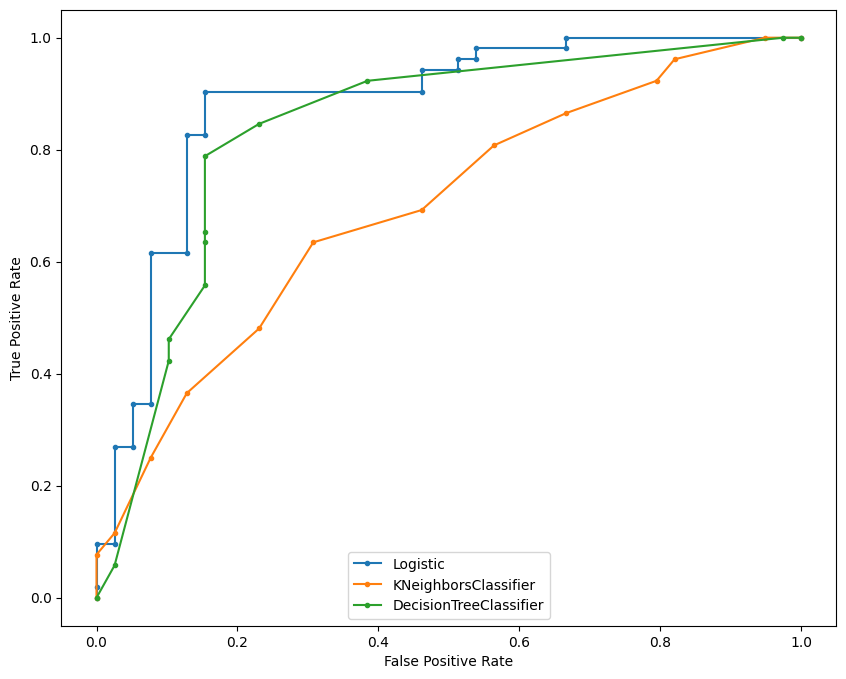

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(fpr_lr, tpr_lr, marker='.', label='Logistic')
ax.plot(fpr_knn, tpr_knn, marker='.', label='KNeighborsClassifier')
ax.plot(fpr_dtc, tpr_dtc, marker='.', label='DecisionTreeClassifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=8)

plt.show()

from it can be clearly interpreted that the AREA under the LOGISTIC curve is more than the other two curves and hence provides a better accuracy over the other two...

Apparantly we can also check the roc_auc_score using the below module

In [25]:
from sklearn.metrics import roc_auc_score

auc_lr = roc_auc_score(y_test, prob_lr)
auc_knn = roc_auc_score(y_test, prob_knn)
auc_dtc = roc_auc_score(y_test, prob_dtc)

print(f'Logistic : ROC AUC = {round(auc_lr, 3)*100} %')
print(f'Logistic : ROC AUC = {round(auc_knn, 3)*100} %')
print(f'Logistic : ROC AUC = {round(auc_dtc, 3)*100} %')

Logistic : ROC AUC = 88.1 %
Logistic : ROC AUC = 69.5 %
Logistic : ROC AUC = 83.7 %


Code to allow user to query by providing details of a patient as input and determining whether the patient lives or dies

In [26]:
# from pandas.core.window.expanding import ExpandingGroupby
# from matplotlib.projections.polar import ThetaAxis
#n = int(input("Enter no of Patients who's Status is to be Determined :- "))

# def Prediction() :
 # age = int(input("Age of the Patient :- "))
  #sex = int(input("Sex of the Patient (0 - female & 1 - male) :- "))
  #cp = int(input("Chest Pain Type :- "))
  #trestbps = int(input("Resting Blood Pressure :- "))
  #chol = int(input("Serum Cholestrol :- "))
  #fbs = int(input("Fasting Blood Sugar :- "))
  #restecg = int(input("Resting ElectroCardiographic Result :- "))
  #thalach = int(input("Maximum Heart Rate Achieved :- "))
  #exang = int(input("Exercise-include angina (1 - True, 0 - False) :- "))
  #oldpeak = float(input("ST Depression induced by Exercise relative to Rest :- "))
  #slope = int(input("Slope of Peak Exercise ST segment :- "))
  #ca = int(input("No. of Major Vessels (0-3) :- "))
  #thal = int(input("Thalasemia Indicator :- "))
#   new_patient = np.array([age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal])

#   new_patient = new_patient.reshape(1,-1) #converting to 2D array

#   if clf_lr.predict(new_patient) == 0 :
#     return "The Patient with the above provided Vitals Dies!!!"
#   else :
#     return "The Patient with the above provided vitals Lives!!!"

# for i in range(n) :
#   print(Prediction())

The Above Provided Vitals taken from a random patient... our modal has predicted that the Patient Lives !!! -> The model can be used to check the Status of any number of Patients at a time hence saving time !!!